In [1]:
import pip
pip.main(['install','seaborn']);

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


You should consider upgrading via the 'C:\Users\Anna\.pyenv\pyenv-win\versions\3.9.6\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
output_path = 'C:\\Users\\Anna\\Metacity\\Metacity-SynthPop\\output'

# HTS activity chains

In [4]:
hts_trips = pd.read_csv(output_path+'\hts_trips_extracted.csv')
hts_activities = pd.read_csv(output_path+'\hts_activities_extracted.csv')
hts_activities["o_order"] = hts_activities.activity_order.values
hts_activities["d_order"] = hts_activities.activity_order.values
hts_trips["o_order"] = hts_trips.trip_order
hts_trips["d_order"] = hts_trips.trip_order + 1


hts_joined_origin = hts_activities.merge(hts_trips, on=["traveler_id", "o_order"])
hts_joined_dest = hts_activities.merge(hts_trips, on=["traveler_id", "d_order"])

traveler_ids = hts_activities.traveler_id.unique()

display(hts_activities.head(2))
display(hts_trips.head(2))
display(hts_joined_origin.head(2))

,Unnamed: 0,traveler_id,purpose,start_time,end_time,activity_order,o_order,d_order
0,0,1,home,NaN,27000.0,0,0,0
1,1,1,education,27900.0,50400.0,1,1,1


,Unnamed: 0,traveler_id,traveling_mode,trip_order,o_order,d_order
0,0,1,pt,0,0,1
1,1,1,pt,1,1,2


,Unnamed: 0_x,traveler_id,purpose,start_time,end_time,activity_order,o_order,d_order_x,Unnamed: 0_y,traveling_mode,trip_order,d_order_y
0,0,1,home,NaN,27000.0,0,0,0,0,pt,0,1
1,1,1,education,27900.0,50400.0,1,1,1,1,pt,1,2


In [14]:
travelers = hts_activities.groupby("traveler_id")
df_count = [[i, df.shape[0]] for i, df in travelers]
df_count = pd.DataFrame(columns=["traveler_id", "activity_count"], data=df_count)
df_count.set_index("traveler_id", inplace=True, drop=True)
display(df_count.head(2))

,activity_count
traveler_id,
1,3
2,3


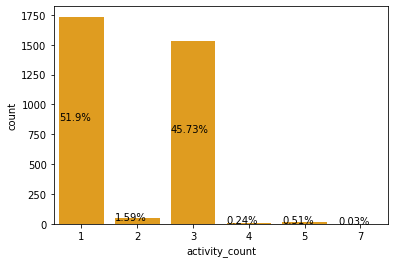

In [15]:
g = sns.countplot(x="activity_count", color="orange",data=df_count)
for p in g.patches:
    txt = str((p.get_height()/df_count.shape[0]*100).round(2)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()/2
    g.text(txt_x,txt_y,txt)

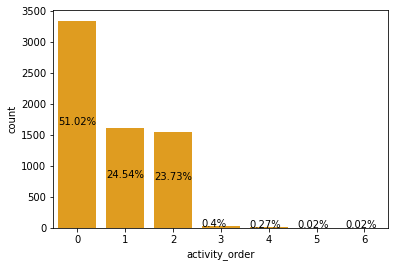

In [5]:
g = sns.countplot(x="activity_order", color="orange",data=hts_activities)
for p in g.patches:
    txt = str((p.get_height()/hts_activities.shape[0]*100).round(2)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()/2
    g.text(txt_x,txt_y,txt)

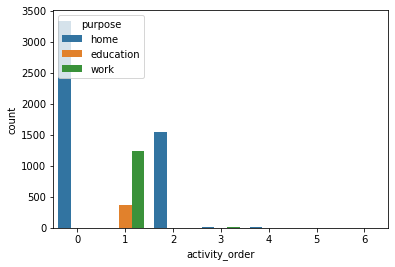

In [6]:
g = sns.countplot(x="activity_order", hue="purpose",data=hts_activities)

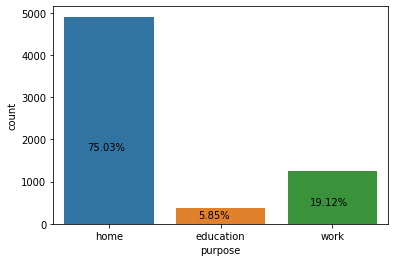

In [7]:
g = sns.countplot(x="purpose", data=hts_activities)
for p in g.patches:
    txt = str((p.get_height()/hts_activities.shape[0]*100).round(2)) + '%'
    txt_x = p.get_x() + 0.2
    txt_y = p.get_height()/2.8
    g.text(txt_x,txt_y,txt)

<AxesSubplot:xlabel='traveling_mode', ylabel='count'>

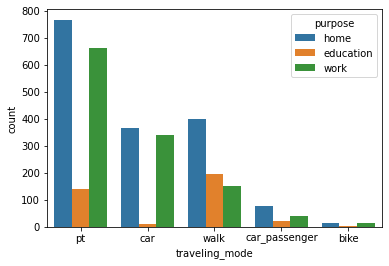

In [8]:
sns.countplot(x="traveling_mode", hue="purpose", data=hts_joined_origin)

<AxesSubplot:xlabel='traveling_mode', ylabel='count'>

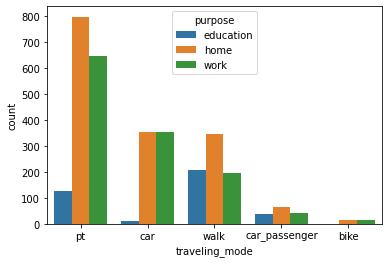

In [9]:
sns.countplot(x="traveling_mode", hue="purpose", data=hts_joined_dest)

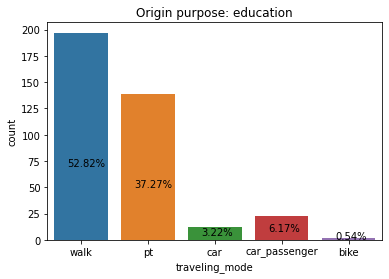

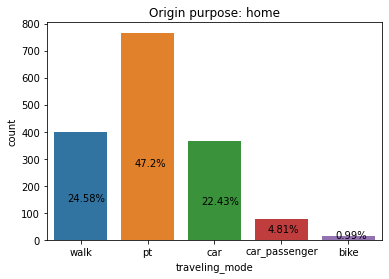

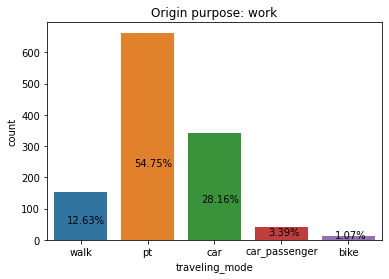

In [11]:
purposes_org = hts_joined_origin.groupby("purpose")

for p, df in purposes_org:

    g = sns.countplot(x="traveling_mode",order=['walk','pt','car','car_passenger','bike'], data=df)
    for l in g.patches:
        txt = str((l.get_height()/df.shape[0]*100).round(2)) + '%'
        txt_x = l.get_x() + 0.2
        txt_y = l.get_height()/2.8
        g.text(txt_x,txt_y,txt)
    plt.title("Origin purpose: "+str(p))
    plt.show()

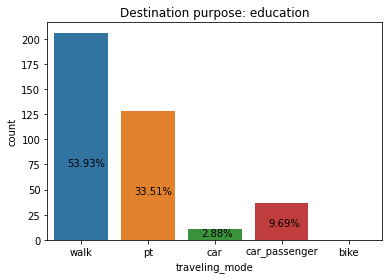

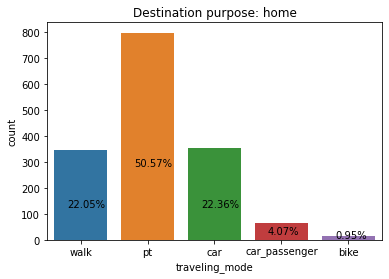

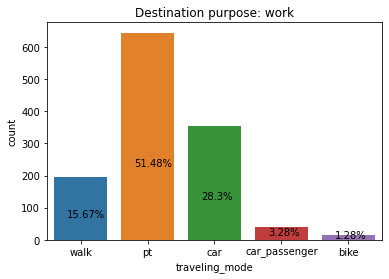

In [12]:
purposes_dest = hts_joined_dest.groupby("purpose")

for p, df in purposes_dest:

    g = sns.countplot(x="traveling_mode",order=['walk','pt','car','car_passenger','bike'], data=df)
    for l in g.patches:
        txt = str((l.get_height()/df.shape[0]*100).round(2)) + '%'
        txt_x = l.get_x() + 0.2
        txt_y = l.get_height()/2.8
        g.text(txt_x,txt_y,txt)
    plt.title("Destination purpose: "+str(p))
    plt.show()